In [70]:
import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

In [71]:
DATAPATH = 'data/'

In [72]:
data = pd.read_csv(DATAPATH+'openfoodfacts.csv',delimiter='\t',low_memory=True)

C:\Users\johan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,3,5,24,25,26,28,36,41,42,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [73]:
pd.options.display.max_seq_items=1000
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size',
       'serving_quantity', 'no_nutriments', 'additives_n', 'additives',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be

In [74]:
data_=data.dropna(subset=['labels_tags'])

In [75]:
#np.set_printoptions(threshold=np.nan)
import re
pat = re.compile("/vegan/")
vegan_set=data_[data_['labels_tags'].str.contains('vegan').fillna(False) & (~ data_['labels_tags'].str.contains('no-vegan').fillna(False)) ]

In [76]:
origin_lists=vegan_set.origins_tags.dropna().str.split(',')

In [77]:
origin_exploded=origin_lists.apply(pd.Series).unstack()

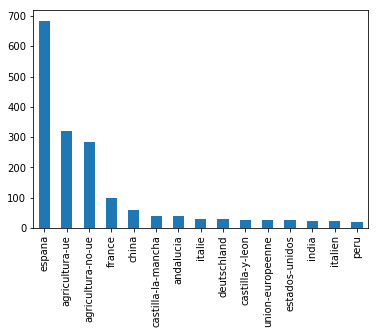

In [78]:
origin_exploded.value_counts().head(15).plot.bar()
plt.show()

In [79]:
vegan_set["created_datetime"] = pd.to_datetime(vegan_set["created_datetime"],errors="coerce")
dateparsed = vegan_set[vegan_set["created_datetime"].notnull()]

C:\Users\johan\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
vegan_date=dateparsed.reset_index().set_index('created_datetime')

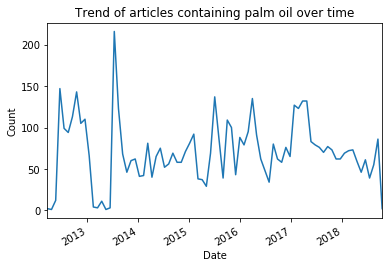

In [81]:
vegan_date["count"] = 1
vegan_date = vegan_date["count"].resample("30D").sum()
vegan_date.plot.line(title="Trend of articles containing palm oil over time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

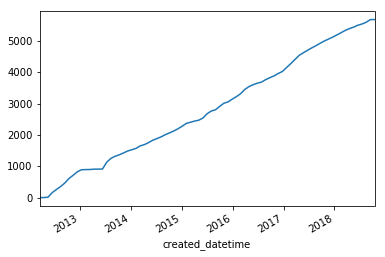

In [82]:
vegan_date.cumsum().plot.line()
plt.show()

In [84]:
fat_set=data.dropna(subset=['fat_100g'])

In [ ]:
fat_set.merge(vegan_set,how='inner').head()